# Rushing

The simulator is robust enough to simulate sending rushes to your opponent. This can be used to forecast future cash and eco in the case of planned rushes. We offer two examples to the user that showcase this ability:
1. A typical Round 13 layered regen rainbow rush of death
2. A single pressure FZOMG on Round 22

In [1]:
import b2sim as b2

## R13 Regen Rainbow Rush of Death

,Time,Type,Message
0,268.4,Round,Round 13 start
1,268.4,Eco,Change eco to Grouped Leads
2,268.6,Eco,Change eco to Grouped Rainbows
3,269.3,Eco,Change eco to Grouped Zebras
4,271.2,Eco,Change eco to Grouped Purples
5,273.6,Eco,Change eco to Zero
6,288.0,Round,Round 14 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,800.0,0,800.0,245.0,268.0,288.0


The current cash and eco are (3346.5000000000014,783.5000000000005)


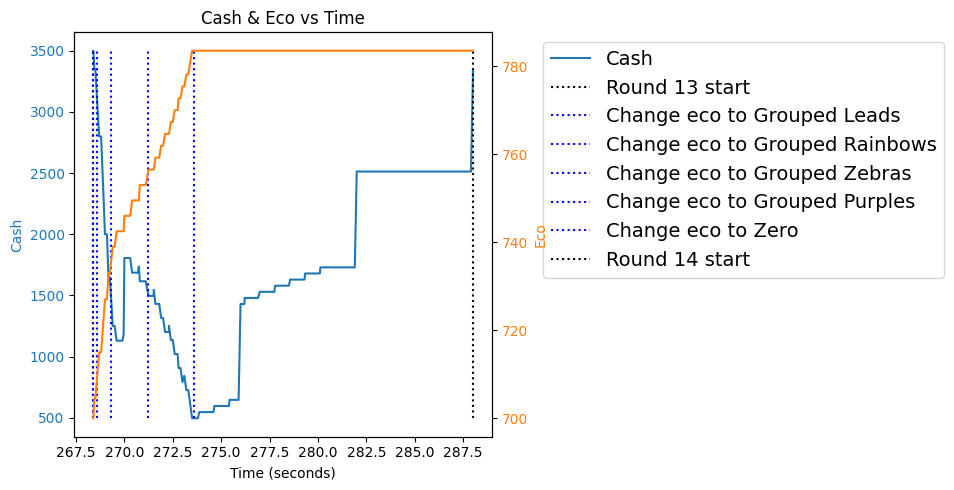

In [2]:
rounds = b2.Rounds(0.1)

farms = [
    b2.initFarm(rounds.getTimeFromRound(7), upgrades = [3,2,0])
]

eco_queue = [
    b2.ecoSend(send_name = 'Grouped Leads', max_send_amount = 2, time = rounds.getTimeFromRound(13)),
    b2.ecoSend(send_name = 'Grouped Rainbows', max_send_amount = 5, property='Regrow'),
    b2.ecoSend(send_name = 'Grouped Zebras', max_send_amount = 5),
    b2.ecoSend(send_name = 'Grouped Purples', max_send_amount = 10),
]

initial_state_game = {
    'Cash': 3500,
    'Eco': 700,
    'Eco Queue': eco_queue,
    'Rounds': rounds,
    'Farms': farms,
    'Game Round': 13
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 14)
game_state.viewCashEcoHistory(dim=(10,5), display_farms= True, font_size=14)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'rrod_example')

## A Single FZOMG on R22

,Time,Type,Message
0,466.0,Round,Round 21 start
1,466.0,Eco,Change eco to Grouped Pinks
2,471.9,Eco,Change eco to Zero
3,483.9,Round,Round 22 start
4,483.9,Eco,Change eco to Spaced ZOMGs
5,484.0,Eco,Change eco to Grouped Pinks
6,515.9,Round,Round 23 start
7,530.0,Round,Round 24 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,11250.0,0,11250.0,1055.0,466.0,530.0


The current cash and eco are (12651.400000000101,2378.400000000022)


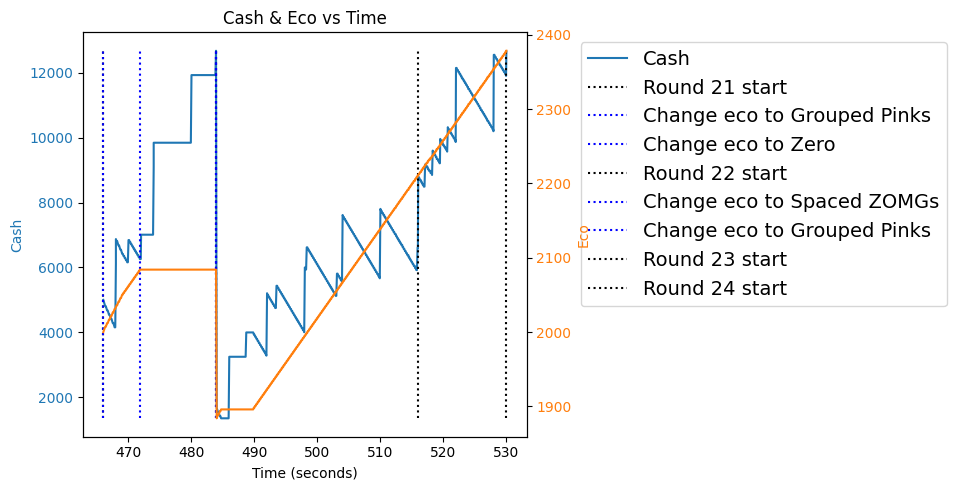

In [3]:
rounds = b2.Rounds(0.1)

farms = [
    b2.initFarm(rounds.getTimeFromRound(19.9), upgrades = [4,2,0])
]

eco_queue = [
    b2.ecoSend(send_name = 'Grouped Pinks', time = 0),
    b2.ecoSend(send_name = 'Zero', time = rounds.getTimeFromRound(22) - 12),
    b2.ecoSend(send_name = 'Spaced ZOMGs', max_send_amount = 1, time = rounds.getTimeFromRound(22), property='Fortified'),
    b2.ecoSend(send_name = 'Grouped Pinks'),
]

initial_state_game = {
    'Cash': 5000,
    'Eco': 2000,
    'Eco Queue': eco_queue,
    'Rounds': rounds,
    'Farms': farms,
    'Game Round': 21
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 24)
game_state.viewCashEcoHistory(dim=(10,5), font_size=14)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'R22_FZOMG')